# Number of elements

$so(n) = \frac{n(n-1)}{2}$


$su(n) = n^2 -1$ 

In [1]:
import numpy as np
import scipy

from toqito.states import basis
from toqito.matrix_props import is_hermitian
from toqito.matrices import pauli

In [2]:
# su2 generators

e1 = pauli("X")
e2 = pauli("Y")
e3 = pauli("Z")
su2_basis = [e1, e2, e3]

j=1
print("su(2) basis \n")
for i in su2_basis:
    print("Element", j ,"\n", i, "\n")
    j += 1


su(2) basis 

Element 1 
 [[0 1]
 [1 0]] 

Element 2 
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]] 

Element 3 
 [[ 1  0]
 [ 0 -1]] 



In [3]:
# add an extra row and column of zeroes to su2 basis elements
extended_basis = []
array_0_2_pos = np.array([[0, 0]])
array_0_3_pos = np.array([[0, 0, 0]])

for i in su2_basis:
    extended_col_ei = np.concatenate((i, array_0_2_pos.T), axis=1)
    extended_ei = np.concatenate((extended_col_ei, array_0_3_pos), axis=0)
    extended_basis.append(extended_ei)

j=1
print("Extended su(2) basis \n")
for i in extended_basis:
    print("Extended Element", j ,"\n", i, "\n")
    j += 1


Extended su(2) basis 

Extended Element 1 
 [[0 1 0]
 [1 0 0]
 [0 0 0]] 

Extended Element 2 
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 3 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 



In [4]:
# su3 basis elements
e1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
e2 = np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]])
e3 = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
e4 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]])
e5 = np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]])
e6 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
e7 = np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]])
e8 = (1/np.sqrt(3))*np.array([[1, 0, 0], [0, 1, 0], [0, 0, -2]])

su3_basis = [e1, e2, e3, e4, e5, e6, e7, e8]

j=1
print("su(3) basis \n")
for i in su3_basis:
    print("Element", j ,"\n", i, "\n")
    j += 1


su(3) basis 

Element 1 
 [[0 1 0]
 [1 0 0]
 [0 0 0]] 

Element 2 
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 

Element 3 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 

Element 4 
 [[0 0 1]
 [0 0 0]
 [1 0 0]] 

Element 5 
 [[ 0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]] 

Element 6 
 [[0 0 0]
 [0 0 1]
 [0 1 0]] 

Element 7 
 [[ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+1.j  0.+0.j]] 

Element 8 
 [[ 0.57735027  0.          0.        ]
 [ 0.          0.57735027  0.        ]
 [ 0.          0.         -1.15470054]] 



In [5]:
# verify some elements of su2 are in su3
embedding_counter = 0

for i in extended_basis:
    for j in su3_basis:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((3,3))):
            print(i, "\n an element in the extended su2 basis is also an element in the su3 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su2 extended basis elements embedded in su3.")

[[0 1 0]
 [1 0 0]
 [0 0 0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[0 1 0]
 [1 0 0]
 [0 0 0]] 

[[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[ 0.+0.j -0.-1.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]] 

[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 
 an element in the extended su2 basis is also an element in the su3 basis as 
 [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  0]] 

3  is the total number of su2 extended basis elements embedded in su3.


In [6]:
# extend the su3 basis
# add an extra row and column of zeroes to su2 basis elements
extended_su3_basis = []
array_0_3_pos = np.array([[0, 0, 0]])
array_0_4_pos = np.array([[0, 0, 0, 0]])

for i in su3_basis:
    extended_col_ei = np.concatenate((i, array_0_3_pos.T), axis=1)
    extended_ei = np.concatenate((extended_col_ei, array_0_4_pos), axis=0)
    extended_su3_basis.append(extended_ei)

j=1
print("Extended su(3) basis \n")
for i in extended_su3_basis:
    print("Extended Element", j ,"\n", i, "\n")
    j += 1


Extended su(3) basis 

Extended Element 1 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Extended Element 2 
 [[ 0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 3 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]] 

Extended Element 4 
 [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 

Extended Element 5 
 [[ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 6 
 [[0 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 0]] 

Extended Element 7 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Extended Element 8 
 [[ 0.57735027  0.          0.          0.        ]
 [ 0.          0.57735027  0.          0.        ]
 [ 0.          0.         -1.15470054  0.        ]
 [ 0.          0.      

In [7]:
# definig the basis for matrix representation of su(4) algebra (old basis)
# taken directly from chapter 4 of pfeifer
# note the ordering of elements is different from how it is defined in pfeifer

n = 4
# get the column vectors
dim_4_ket = [basis(n, 0), basis(n, 1), basis(n, 2), basis(n, 3)]

# get the bra
dim_4_bra = []
for i in range(n):
    item = dim_4_ket[i]
    dim_4_bra.append(item.conj().T)

su4_basis = []

# create basis elements where Pauli X moves along the matrix blocks
for i in range(n):
    for k in range(1, n):
        if i < k:
            mat_ik = (np.outer(dim_4_ket[i], dim_4_ket[k])+np.outer(dim_4_ket[k], dim_4_ket[i]))
            su4_basis.append(mat_ik)

# create basis elements where Pauli Y moves along the matrix
for i in range(n):
    for k in range(1, n):
        if i < k:
            mat_ik = (np.outer(dim_4_ket[i], dim_4_ket[k])-np.outer(dim_4_ket[k], dim_4_ket[i]))
            su4_basis.append(-1j*mat_ik)

# append 1 pauli z block
su4_basis.append(np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, 0, 0],[0, 0, 0, 0]]))

# append eq4.2 of pfeifer with a column and row of zeroes
su4_basis.append((1/np.sqrt(3))*np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -2, 0],[0, 0, 0, 0]]))

# append eq4.2 of pfeifer with a column and row of zeroes
su4_basis.append((1/np.sqrt(6))*np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],[0, 0, 0, -3]]))


print("Old su(4) basis \n")
# print basis
j = 1
for i in su4_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

Old su(4) basis 

Basis Element 1 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Basis Element 2 
 [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 

Basis Element 3 
 [[0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]] 

Basis Element 4 
 [[0 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 0]] 

Basis Element 5 
 [[0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 1 0 0]] 

Basis Element 6 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]] 

Basis Element 7 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 8 
 [[0.-0.j 0.-0.j 0.-1.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 9 
 [[0.-0.j 0.-0.j 0.-0.j 0.-1.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 10 
 [[0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-1.j 0.-0.j]
 [0.-0.j 0.+1.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Eleme

In [8]:
# verify some elements of su3 are in su4
embedding_counter = 0

for i in extended_su3_basis:
    for j in su4_basis:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((4,4))):
            print(i, "\n an element in the extended su3 basis is also an element in the su4 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su3 extended basis elements embedded in the old su4 basis.")

[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 
 an element in the extended su3 basis is also an element in the su4 basis as 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

[[ 0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 
 an element in the extended su3 basis is also an element in the su4 basis as 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]] 
 an element in the extended su3 basis is also an element in the su4 basis as 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]] 

[[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 
 an element in the extended su3 basis is also an element in the su4 basis as 
 [[0 0 1 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]] 

[[ 0.+0.j  0.+0.j -0.-1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]

In [9]:
from sympy.physics.quantum import TensorProduct
# new su(4) basis (Aryan)
list = []
s0 = np.array([[1,0],[0,1]])
s1 = np.array([[0,1],[1,0]])
s2 = np.array([[0,-1j],[1j,0]])
s3 = np.array([[1,0],[0,-1]])
list.append(s0)
list.append(s1)
list.append(s2)
list.append(s3)
#print('list of matrices :',list)
matrix_list = []
for i in list:
    for j in list:
        x = TensorProduct(i,j)
        matrix_list.append(x)
        # print(x, "\n")

su4_basis_new = []

for i in matrix_list[1:]:
    su4_basis_new.append(i)

print("New su(4) basis \n")
# print basis
j = 1
for i in su4_basis_new:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

New su(4) basis 

Basis Element 1 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]] 

Basis Element 2 
 [[0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]] 

Basis Element 3 
 [[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]] 

Basis Element 4 
 [[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]] 

Basis Element 5 
 [[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]] 

Basis Element 6 
 [[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]] 

Basis Element 7 
 [[ 0  0  1  0]
 [ 0  0  0 -1]
 [ 1  0  0  0]
 [ 0 -1  0  0]] 

Basis Element 8 
 [[0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]] 

Basis Element 9 
 [[0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]] 

Basis Element 10 
 [[ 0.+0.j  0.-0.j  0.-0.j 

In [10]:
# verify if elements of su3 are in new su4 basis
embedding_counter = 0

for i in extended_su3_basis:
    for j in su4_basis_new:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((4,4))):
            print(i, "\n an element in the extended su3 basis is also an element in the new su4 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of su3 extended basis elements embedded in the new su4 basis.")

0  is the total number of su3 extended basis elements embedded in the new su4 basis.


In [11]:
#so(6)
sigma_1=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, -1j, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1j, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_2=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1j],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1j, 0, 0]])
sigma_3=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, -1j],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1j, 0, 0, 0, 0]])
sigma_4=np.array([[0, 0, 0, 0, -1j, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_5=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1j],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1j, 0, 0, 0]])
sigma_6=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 1j, 0, 0, 0],
    [0, -1j, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_7=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1j, 0, 0],
    [0, 0, -1j, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_8=np.array([[0, 0, -1j, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_9=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1j],
    [0, 0, 0, 0, -1j, 0]])
sigma_10=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, -1j, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1j, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_11=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1j, 0],
    [0, 0, 0, -1j, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_12=np.array([[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, -1j, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1j, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_13=np.array([[0, 0, 0, 0, 0, 1j], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [-1j, 0, 0, 0, 0, 0]])
sigma_14=np.array([[0, 1j, 0, 0, 0, 0], 
    [-1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])
sigma_15=np.array([[0, 0, 0, -1j, 0, 0], 
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1j, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])

so6_basis = [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5, sigma_6, sigma_7, sigma_8, sigma_9, sigma_10, sigma_11, sigma_12, sigma_13, sigma_14, sigma_15]
# print basis

print("New so(6) basis \n")
j = 1
for i in so6_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

New so(6) basis 

Basis Element 1 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.-1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

Basis Element 2 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+1.j  0.+0.j  0.+0.j]] 

Basis Element 3 
 [[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]] 

B

In [12]:
# definig the basis for matrix representation of so(6) algebra based on the definition in Byrd's paper

n = 6
# get the column vectors
dim_6_ket = [basis(n, 0), basis(n, 1), basis(n, 2), basis(n, 3), basis(n, 4), basis(n, 5)]
# get the bra
dim_6_bra = []
for i in range(n):
    item = dim_6_ket[i]
    dim_6_bra.append(item.conj().T)

so6_basis_old = []
for i in range(n):
    for k in range(1, n):
        if i < k:
            m_ik = -1j*(np.outer(dim_6_ket[i], dim_6_ket[k])-np.outer(dim_6_ket[k], dim_6_ket[i]))
            so6_basis_old.append(m_ik)

print("Old so(6) basis \n")
# print basis
j = 1
for i in so6_basis_old:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1


Old so(6) basis 

Basis Element 1 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 2 
 [[0.-0.j 0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 3 
 [[0.-0.j 0.-0.j 0.-0.j 0.-1.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 4 
 [[0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-1.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 

## Defining a newer $so(6)$ basis based on the relationship between new and old su(4) basis

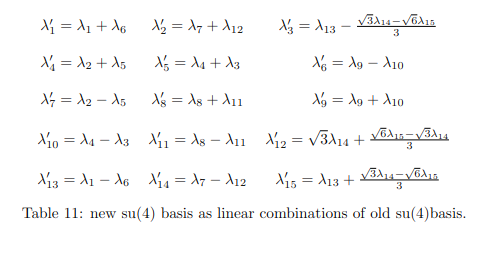



In [13]:
# newer so(6) basis
e1 = 0.5*(so6_basis[0] + so6_basis[12])
e2 = 0.5*(so6_basis[3] + so6_basis[6])
e3 = 0.5*(so6_basis[4] - so6_basis[9])
e4 = 0.5*(so6_basis[4] + so6_basis[9])
e5 = 0.5*(so6_basis[3] - so6_basis[6])
e6 = 0.5*(so6_basis[0] - so6_basis[12])
e7 = 0.5*(so6_basis[1] + so6_basis[13])
e8 = 0.5*(so6_basis[7] + so6_basis[10])
e9 = 0.5*(so6_basis[8] + so6_basis[5])
e10 = 0.5*(so6_basis[8] - so6_basis[5])
e11 = 0.5*(so6_basis[7] - so6_basis[10])
e12 = 0.5*(so6_basis[1] - so6_basis[13])
e13 = 0.5*(so6_basis[2] + so6_basis[14])
e14 = (2*so6_basis[11] + so6_basis[14]-so6_basis[2])/(2*np.sqrt(3))
e15 = (so6_basis[11] - so6_basis[14] + so6_basis[2])/(np.sqrt(6))

so6_v2 = [np.sqrt(2)*e1, np.sqrt(2)*e2, np.sqrt(2)*e3, np.sqrt(2)*e4, np.sqrt(2)*e5, np.sqrt(2)*e6, np.sqrt(2)*e7,
          np.sqrt(2)*e8, np.sqrt(2)*e9, np.sqrt(2)*e10, np.sqrt(2)*e11, np.sqrt(2)*e12, np.sqrt(2)*e13, np.sqrt(2)*e14, np.sqrt(2)*e15]

# check if this is a valid basis
# check whether basis is hermitian

j = 1
for i in so6_v2:
    print("Basis Element", j)
    print("Is matrix Hermitian? ",is_hermitian(i), "\n")
    j = j+1

# check whether the trace condition is satisfied
# Tr$(\lambda_i \lambda_j) = 2\delta_{ik}$

for i in range(len(so6_v2)):
    for j in range(len(so6_v2)):
        mat_prod = np.matmul(so6_v2[i], so6_v2[j])
        if i == j:
            print("Element ", i+1, "with itself has trace", np.trace(mat_prod))

for i in range(len(so6_v2)):
    print("\n")
    for j in range(len(so6_v2)):
        mat_prod = np.matmul(so6_v2[i], so6_v2[j])
        if i != j:
            print("Element ", i+1, "with Element ",j+1,"has trace", np.trace(mat_prod))

Basis Element 1
Is matrix Hermitian?  True 

Basis Element 2
Is matrix Hermitian?  True 

Basis Element 3
Is matrix Hermitian?  True 

Basis Element 4
Is matrix Hermitian?  True 

Basis Element 5
Is matrix Hermitian?  True 

Basis Element 6
Is matrix Hermitian?  True 

Basis Element 7
Is matrix Hermitian?  True 

Basis Element 8
Is matrix Hermitian?  True 

Basis Element 9
Is matrix Hermitian?  True 

Basis Element 10
Is matrix Hermitian?  True 

Basis Element 11
Is matrix Hermitian?  True 

Basis Element 12
Is matrix Hermitian?  True 

Basis Element 13
Is matrix Hermitian?  True 

Basis Element 14
Is matrix Hermitian?  True 

Basis Element 15
Is matrix Hermitian?  True 

Element  1 with itself has trace (2.0000000000000004+0j)
Element  2 with itself has trace (2.0000000000000004+0j)
Element  3 with itself has trace (2.0000000000000004+0j)
Element  4 with itself has trace (2.0000000000000004+0j)
Element  5 with itself has trace (2.0000000000000004+0j)
Element  6 with itself has trace (

In [14]:
print("v2 so(6) basis \n")
# print basis
j = 1
for i in so6_v2:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1

v2 so(6) basis 

Basis Element 1 
 [[0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.70710678j]
 [0.+0.j         0.+0.j         0.+0.j         0.-0.70710678j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j        ]
 [0.-0.70710678j 0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j        ]] 

Basis Element 2 
 [[0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.-0.70710678j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.70710678j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.-0.70710678j 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.70710678j 0.+0.j         0.+0.j         0.+0.j
  0.

In [15]:
# define the commutator
def commutator(a_matrix, b_matrix):
    diff = np.matmul(a_matrix, b_matrix) - np.matmul(b_matrix, a_matrix)
    return diff
# find the third element in the commutator
# find the matrices that commute with each other and non-zero positions of those that do
for i in range(len(so6_v2)):
    print("\n")
    for j in range(len(so6_v2)):
        if i != j:
            comm_ij = commutator(so6_v2[i], so6_v2[j])
            if np.array_equal(comm_ij, np.zeros((4,4))):
                print("[ Lambda ",i+1,", Lambda ", j+1," ] = 0")
            for k in range(len(so6_v2)):
                basis_times_i = 1j*2*so6_v2[k]
                diff1 = comm_ij - basis_times_i
                diff2 = comm_ij + basis_times_i
                if np.array_equal(diff1, np.zeros((6,6))):
                    print("[ Lambda ",i+1,", Lambda ", j+1," ] = 2i Lambda", k+1)
                elif np.array_equal(diff2, np.zeros((6,6))):
                    print("[ Lambda ",i+1,", Lambda ", j+1," ] = -2i Lambda", k+1)
                elif np.array_equal(np.nonzero(comm_ij), np.nonzero(so6_v2[k])):
                    print("[ Lambda ",i+1,", Lambda ", j+1," ] = Some linear combination with the 3 diagonal matrices or Lambda", k+1)



[ Lambda  1 , Lambda  2  ] = Some linear combination with the 3 diagonal matrices or Lambda 9
[ Lambda  1 , Lambda  2  ] = Some linear combination with the 3 diagonal matrices or Lambda 10
[ Lambda  1 , Lambda  3  ] = Some linear combination with the 3 diagonal matrices or Lambda 8
[ Lambda  1 , Lambda  3  ] = Some linear combination with the 3 diagonal matrices or Lambda 11
[ Lambda  1 , Lambda  4  ] = Some linear combination with the 3 diagonal matrices or Lambda 8
[ Lambda  1 , Lambda  4  ] = Some linear combination with the 3 diagonal matrices or Lambda 11
[ Lambda  1 , Lambda  5  ] = Some linear combination with the 3 diagonal matrices or Lambda 9
[ Lambda  1 , Lambda  5  ] = Some linear combination with the 3 diagonal matrices or Lambda 10
[ Lambda  1 , Lambda  7  ] = Some linear combination with the 3 diagonal matrices or Lambda 13
[ Lambda  1 , Lambda  8  ] = Some linear combination with the 3 diagonal matrices or Lambda 3
[ Lambda  1 , Lambda  8  ] = Some linear combination 

In [16]:
# find the commuting elements i.e zero structure constants
for i in range(len(so6_v2)):
    print("\n")
    for j in range(len(so6_v2)):
        print("\n")
        for k in range(len(so6_v2)):
            if i != j != k:
                comm_ij = commutator(so6_v2[i], so6_v2[j])
                comm_ij_times_k = np.matmul(comm_ij, so6_v2[k])
                tr_ijk = np.trace(comm_ij_times_k)
                if tr_ijk == 0:
                    print("Elements", i+1, j+1, k+1, "commute")







Elements 1 2 1 commute
Elements 1 2 3 commute
Elements 1 2 4 commute
Elements 1 2 5 commute
Elements 1 2 6 commute
Elements 1 2 7 commute
Elements 1 2 8 commute
Elements 1 2 9 commute
Elements 1 2 11 commute
Elements 1 2 12 commute
Elements 1 2 13 commute
Elements 1 2 14 commute
Elements 1 2 15 commute


Elements 1 3 1 commute
Elements 1 3 2 commute
Elements 1 3 4 commute
Elements 1 3 5 commute
Elements 1 3 6 commute
Elements 1 3 7 commute
Elements 1 3 8 commute
Elements 1 3 9 commute
Elements 1 3 10 commute
Elements 1 3 12 commute
Elements 1 3 13 commute
Elements 1 3 14 commute
Elements 1 3 15 commute


Elements 1 4 1 commute
Elements 1 4 2 commute
Elements 1 4 3 commute
Elements 1 4 5 commute
Elements 1 4 6 commute
Elements 1 4 7 commute
Elements 1 4 9 commute
Elements 1 4 10 commute
Elements 1 4 11 commute
Elements 1 4 12 commute
Elements 1 4 13 commute
Elements 1 4 14 commute
Elements 1 4 15 commute


Elements 1 5 1 commute
Elements 1 5 2 commute
Elements 1 5 3 commute
Elemen

In [17]:
# find the structure constants
for i in range(len(so6_v2)):
    print("\n")
    for j in range(len(so6_v2)):
        for k in range(len(so6_v2)):
            if i != j != k:
                comm_ij = commutator(so6_v2[i], so6_v2[j])
                comm_ij_times_k = np.matmul(comm_ij, so6_v2[k])
                tr_ijk = np.trace(comm_ij_times_k)
                if tr_ijk != 0:
                    print("Structure constant", i+1, j+1, k+1, " =", -0.25*1j*tr_ijk)



Structure constant 1 2 10  = (-0.35355339059327384+0j)
Structure constant 1 3 11  = (-0.35355339059327384+0j)
Structure constant 1 4 8  = (-0.35355339059327384+0j)
Structure constant 1 5 9  = (-0.35355339059327384+0j)
Structure constant 1 7 13  = (-0.7071067811865477+0j)
Structure constant 1 8 4  = (0.35355339059327384-0j)
Structure constant 1 9 5  = (0.35355339059327384-0j)
Structure constant 1 10 2  = (0.35355339059327384-0j)
Structure constant 1 11 3  = (0.35355339059327384-0j)
Structure constant 1 13 7  = (0.7071067811865477-0j)


Structure constant 2 1 10  = (0.35355339059327384-0j)
Structure constant 2 3 12  = (-0.35355339059327384+0j)
Structure constant 2 4 7  = (-0.35355339059327384+0j)
Structure constant 2 6 9  = (-0.35355339059327384+0j)
Structure constant 2 7 4  = (0.35355339059327384-0j)
Structure constant 2 8 13  = (-0.35355339059327384+0j)
Structure constant 2 8 14  = (-0.6123724356957948+0j)
Structure constant 2 9 6  = (0.35355339059327384-0j)
Structure constant 2 10 1

In [18]:
# extend the so6 basis_v2
# add an extra row and column of zeroes to su2 basis elements
extended_so6_v2 = []
array_0_6_pos = np.array([[0, 0, 0, 0, 0, 0]])
array_0_8_pos = np.array([[0, 0, 0, 0, 0, 0, 0, 0]])

for i in so6_v2:
    extended_col1 = np.concatenate((i, array_0_6_pos.T), axis=1)
    extended_col12 = np.concatenate((extended_col1, array_0_6_pos.T), axis=1)
    extended_row1 = np.concatenate((extended_col12, array_0_8_pos), axis=0)
    extended_row12 = np.concatenate((extended_row1, array_0_8_pos), axis=0)
    extended_so6_v2.append(extended_row12)

j=1
print("Extended so(6)_v2 basis \n")
for i in extended_so6_v2:
    print("Extended Element", j ,"\n", i, "\n")
    j += 1


Extended so(6)_v2 basis 

Extended Element 1 
 [[0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.-0.70710678j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.70710678j 0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]] 

Extend

In [19]:
# find non-zero positions in extended so6 basis
for i in range(len(extended_so6_v2)):
    print("\n", "\n", "Element", i+1, "\n")
    mat = extended_so6_v2[i]
    dim_row, dim_column = np.shape(mat)
    for k in range(dim_row):
        for l in range(dim_row):
            if mat[k, l] != 0:
                print("Row",k+1, "Column", l+1)


 
 Element 1 

Row 1 Column 6
Row 2 Column 4
Row 4 Column 2
Row 6 Column 1

 
 Element 2 

Row 1 Column 5
Row 3 Column 4
Row 4 Column 3
Row 5 Column 1

 
 Element 3 

Row 2 Column 5
Row 3 Column 6
Row 5 Column 2
Row 6 Column 3

 
 Element 4 

Row 2 Column 5
Row 3 Column 6
Row 5 Column 2
Row 6 Column 3

 
 Element 5 

Row 1 Column 5
Row 3 Column 4
Row 4 Column 3
Row 5 Column 1

 
 Element 6 

Row 1 Column 6
Row 2 Column 4
Row 4 Column 2
Row 6 Column 1

 
 Element 7 

Row 1 Column 2
Row 2 Column 1
Row 4 Column 6
Row 6 Column 4

 
 Element 8 

Row 1 Column 3
Row 3 Column 1
Row 4 Column 5
Row 5 Column 4

 
 Element 9 

Row 2 Column 3
Row 3 Column 2
Row 5 Column 6
Row 6 Column 5

 
 Element 10 

Row 2 Column 3
Row 3 Column 2
Row 5 Column 6
Row 6 Column 5

 
 Element 11 

Row 1 Column 3
Row 3 Column 1
Row 4 Column 5
Row 5 Column 4

 
 Element 12 

Row 1 Column 2
Row 2 Column 1
Row 4 Column 6
Row 6 Column 4

 
 Element 13 

Row 1 Column 4
Row 2 Column 6
Row 4 Column 1
Row 6 Column 2

 
 Elem

In [20]:
# definig the basis for matrix representation of so(8) algebra

n = 8
# get the column vectors
dim_8_ket = [basis(n, 0), basis(n, 1), basis(n, 2), basis(n, 3), basis(n, 4), basis(n, 5), basis(n, 6), basis(n, 7)]
# get the bra
dim_8_bra = []
for i in range(n):
    item = dim_8_ket[i]
    dim_8_bra.append(item.conj().T)

so8_basis = []
for i in range(n):
    for k in range(1, n):
        if i < k:
            m_ik = -1j*(np.outer(dim_8_ket[i], dim_8_ket[k])-np.outer(dim_8_ket[k], dim_8_ket[i]))
            so8_basis.append(m_ik)

# print basis
print("old so(8) basis \n")
j = 1
for i in so8_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1


old so(8) basis 

Basis Element 1 
 [[0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]] 

Basis Element 2 
 [[0.-0.j 0.-0.j 0.-1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.+1.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]
 [0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j 0.-0.j]

In [21]:
# find non-zero positions in old so8 basis
for i in range(len(so8_basis)):
    print("\n", "\n", "Element", i+1, "\n")
    mat = so8_basis[i]
    dim_row, dim_column = np.shape(mat)
    for k in range(dim_row):
        for l in range(dim_row):
            if mat[k, l] != 0:
                print("Row",k+1, "Column", l+1)


 
 Element 1 

Row 1 Column 2
Row 2 Column 1

 
 Element 2 

Row 1 Column 3
Row 3 Column 1

 
 Element 3 

Row 1 Column 4
Row 4 Column 1

 
 Element 4 

Row 1 Column 5
Row 5 Column 1

 
 Element 5 

Row 1 Column 6
Row 6 Column 1

 
 Element 6 

Row 1 Column 7
Row 7 Column 1

 
 Element 7 

Row 1 Column 8
Row 8 Column 1

 
 Element 8 

Row 2 Column 3
Row 3 Column 2

 
 Element 9 

Row 2 Column 4
Row 4 Column 2

 
 Element 10 

Row 2 Column 5
Row 5 Column 2

 
 Element 11 

Row 2 Column 6
Row 6 Column 2

 
 Element 12 

Row 2 Column 7
Row 7 Column 2

 
 Element 13 

Row 2 Column 8
Row 8 Column 2

 
 Element 14 

Row 3 Column 4
Row 4 Column 3

 
 Element 15 

Row 3 Column 5
Row 5 Column 3

 
 Element 16 

Row 3 Column 6
Row 6 Column 3

 
 Element 17 

Row 3 Column 7
Row 7 Column 3

 
 Element 18 

Row 3 Column 8
Row 8 Column 3

 
 Element 19 

Row 4 Column 5
Row 5 Column 4

 
 Element 20 

Row 4 Column 6
Row 6 Column 4

 
 Element 21 

Row 4 Column 7
Row 7 Column 4

 
 Element 22 

Row 4

In [22]:
# use elements from extended_so6_v2 with elements that don't have the same non-zero positions

attempt1_so8_basis = []
extras = [so8_basis[5], so8_basis[6], so8_basis[11], so8_basis[12], so8_basis[16], so8_basis[17], so8_basis[20], so8_basis[21], so8_basis[23], so8_basis[24], so8_basis[25], so8_basis[26], so8_basis[27]]

for i in extended_so6_v2:
    attempt1_so8_basis.append(i)

for j in extras:
    attempt1_so8_basis.append(j)


# print basis
print("Attempt 1 for new so(8) basis \n")
j = 1
for i in attempt1_so8_basis:
    print("Basis Element", j, "\n", i, "\n")
    j= j+1



Attempt 1 for new so(8) basis 

Basis Element 1 
 [[0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.-0.70710678j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.70710678j 0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]] 

Bas

In [23]:
# use elements from extended_so6_v2 with elements that don't have the same non-zero positions

# attempt1_so8_basis = []
# extras = [so8_basis[5], so8_basis[6], so8_basis[11], so8_basis[12], so8_basis[16], so8_basis[17], so8_basis[20], so8_basis[21], so8_basis[23], so8_basis[24], so8_basis[25], so8_basis[26], so8_basis[27]]

# for i in extended_so6_v2:
#    attempt1_so8_basis.append(i)

# check if this is a valid basis
# check whether basis is hermitian

j = 1
for i in attempt1_so8_basis:
    print("Basis Element", j)
    print("Is matrix Hermitian? ",is_hermitian(i), "\n")
    j = j+1

# check whether the trace condition is satisfied
# Tr$(\lambda_i \lambda_j) = 2\delta_{ik}$

for i in range(len(attempt1_so8_basis)):
    for j in range(len(attempt1_so8_basis)):
        mat_prod = np.matmul(attempt1_so8_basis[i], attempt1_so8_basis[j])
        if i == j:
            print("Element ", i+1, "with itself has trace", np.trace(mat_prod))

for i in range(len(attempt1_so8_basis)):
    print("\n")
    for j in range(len(attempt1_so8_basis)):
        mat_prod = np.matmul(attempt1_so8_basis[i], attempt1_so8_basis[j])
        if i != j:
            print("Element ", i+1, "with Element ",j+1,"has trace", np.trace(mat_prod))

Basis Element 1
Is matrix Hermitian?  True 

Basis Element 2
Is matrix Hermitian?  True 

Basis Element 3
Is matrix Hermitian?  True 

Basis Element 4
Is matrix Hermitian?  True 

Basis Element 5
Is matrix Hermitian?  True 

Basis Element 6
Is matrix Hermitian?  True 

Basis Element 7
Is matrix Hermitian?  True 

Basis Element 8
Is matrix Hermitian?  True 

Basis Element 9
Is matrix Hermitian?  True 

Basis Element 10
Is matrix Hermitian?  True 

Basis Element 11
Is matrix Hermitian?  True 

Basis Element 12
Is matrix Hermitian?  True 

Basis Element 13
Is matrix Hermitian?  True 

Basis Element 14
Is matrix Hermitian?  True 

Basis Element 15
Is matrix Hermitian?  True 

Basis Element 16
Is matrix Hermitian?  True 

Basis Element 17
Is matrix Hermitian?  True 

Basis Element 18
Is matrix Hermitian?  True 

Basis Element 19
Is matrix Hermitian?  True 

Basis Element 20
Is matrix Hermitian?  True 

Basis Element 21
Is matrix Hermitian?  True 

Basis Element 22
Is matrix Hermitian?  True

In [24]:
# find the structure constants for the new so8 basis
for i in range(len(attempt1_so8_basis)):
    print("\n")
    for j in range(len(attempt1_so8_basis)):
        for k in range(len(attempt1_so8_basis)):
            if i != j != k:
                comm_ij = commutator(attempt1_so8_basis[i], attempt1_so8_basis[j])
                comm_ij_times_k = np.matmul(comm_ij, attempt1_so8_basis[k])
                tr_ijk = np.trace(comm_ij_times_k)
                if tr_ijk != 0:
                    print("Structure constant", i+1, j+1, k+1, " =", -0.25*1j*tr_ijk)



Structure constant 1 2 10  = (-0.35355339059327384+0j)
Structure constant 1 3 11  = (-0.35355339059327384+0j)
Structure constant 1 4 8  = (-0.35355339059327384+0j)
Structure constant 1 5 9  = (-0.35355339059327384+0j)
Structure constant 1 7 13  = (-0.7071067811865477+0j)
Structure constant 1 8 4  = (0.35355339059327384-0j)
Structure constant 1 9 5  = (0.35355339059327384-0j)
Structure constant 1 10 2  = (0.35355339059327384-0j)
Structure constant 1 11 3  = (0.35355339059327384-0j)
Structure constant 1 13 7  = (0.7071067811865477-0j)
Structure constant 1 16 26  = (-0.3535533905932738+0j)
Structure constant 1 17 27  = (-0.3535533905932738+0j)
Structure constant 1 18 22  = (0.3535533905932738-0j)
Structure constant 1 19 23  = (0.3535533905932738-0j)
Structure constant 1 22 18  = (-0.3535533905932738+0j)
Structure constant 1 23 19  = (-0.3535533905932738+0j)
Structure constant 1 26 16  = (0.3535533905932738-0j)
Structure constant 1 27 17  = (0.3535533905932738-0j)


Structure constant 2 

In [25]:
# find the commuting elements i.e zero structure constants
for i in range(len(attempt1_so8_basis)):
    print("\n")
    for j in range(len(attempt1_so8_basis)):
        print("\n")
        for k in range(len(attempt1_so8_basis)):
            if i != j != k:
                comm_ij = commutator(attempt1_so8_basis[i], attempt1_so8_basis[j])
                comm_ij_times_k = np.matmul(comm_ij, attempt1_so8_basis[k])
                tr_ijk = np.trace(comm_ij_times_k)
                if tr_ijk == 0:
                    print("Structure constant of elements", i+1, j+1, k+1, "is zero.")







Structure constant of elements 1 2 1 is zero.
Structure constant of elements 1 2 3 is zero.
Structure constant of elements 1 2 4 is zero.
Structure constant of elements 1 2 5 is zero.
Structure constant of elements 1 2 6 is zero.
Structure constant of elements 1 2 7 is zero.
Structure constant of elements 1 2 8 is zero.
Structure constant of elements 1 2 9 is zero.
Structure constant of elements 1 2 11 is zero.
Structure constant of elements 1 2 12 is zero.
Structure constant of elements 1 2 13 is zero.
Structure constant of elements 1 2 14 is zero.
Structure constant of elements 1 2 15 is zero.
Structure constant of elements 1 2 16 is zero.
Structure constant of elements 1 2 17 is zero.
Structure constant of elements 1 2 18 is zero.
Structure constant of elements 1 2 19 is zero.
Structure constant of elements 1 2 20 is zero.
Structure constant of elements 1 2 21 is zero.
Structure constant of elements 1 2 22 is zero.
Structure constant of elements 1 2 23 is zero.
Structure const

In [26]:
# find the third element in the commutator
# find the matrices that commute with each other and non-zero positions of those that do
for i in range(len(attempt1_so8_basis)):
    print("\n")
    for j in range(len(attempt1_so8_basis)):
        if i != j:
            comm_ij = commutator(attempt1_so8_basis[i], attempt1_so8_basis[j])
            if np.array_equal(comm_ij, np.zeros((8,8))):
                print("[ Lambda ",i+1,", Lambda ", j+1," ] = 0")
            for k in range(len(attempt1_so8_basis)):
                basis_times_i = 1j*2*attempt1_so8_basis[k]
                diff1 = comm_ij - basis_times_i
                diff2 = comm_ij + basis_times_i
                if np.array_equal(diff1, np.zeros((8,8))):
                    print("[ Lambda ",i+1,", Lambda ", j+1," ] = 2i Lambda", k+1)
                elif np.array_equal(diff2, np.zeros((8,8))):
                    print("[ Lambda ",i+1,", Lambda ", j+1," ] = -2i Lambda", k+1)
                elif np.array_equal(np.nonzero(comm_ij), np.nonzero(attempt1_so8_basis[k])):
                    print("[ Lambda ",i+1,", Lambda ", j+1," ] = Some linear combination with the 3 diagonal matrices or Lambda", k+1)



[ Lambda  1 , Lambda  2  ] = Some linear combination with the 3 diagonal matrices or Lambda 9
[ Lambda  1 , Lambda  2  ] = Some linear combination with the 3 diagonal matrices or Lambda 10
[ Lambda  1 , Lambda  3  ] = Some linear combination with the 3 diagonal matrices or Lambda 8
[ Lambda  1 , Lambda  3  ] = Some linear combination with the 3 diagonal matrices or Lambda 11
[ Lambda  1 , Lambda  4  ] = Some linear combination with the 3 diagonal matrices or Lambda 8
[ Lambda  1 , Lambda  4  ] = Some linear combination with the 3 diagonal matrices or Lambda 11
[ Lambda  1 , Lambda  5  ] = Some linear combination with the 3 diagonal matrices or Lambda 9
[ Lambda  1 , Lambda  5  ] = Some linear combination with the 3 diagonal matrices or Lambda 10
[ Lambda  1 , Lambda  6  ] = 0
[ Lambda  1 , Lambda  7  ] = Some linear combination with the 3 diagonal matrices or Lambda 13
[ Lambda  1 , Lambda  8  ] = Some linear combination with the 3 diagonal matrices or Lambda 3
[ Lambda  1 , Lambda  

In [27]:
# verify some elements of so6 are in so8
embedding_counter = 0

for i in extended_so6_v2:
    for j in attempt1_so8_basis:
        diff = np.abs(np.subtract(i, j))
        if np.all(diff == np.zeros((8,8))):
            print(i, "\n an element in the extended so6 basis is also an element in the so8 basis as \n",j, "\n")
            embedding_counter += 1

print(embedding_counter, " is the total number of so6 extended basis elements embedded in so8.")

[[0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.-0.70710678j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.70710678j 0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.-0.70710678j 0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+0.j         0.+0.j         0.+0.j         0.+0.j        ]] 
 an element in the extended so6 basis is also an eleme